In [1]:
import pandas as pd
import numpy as np

In [8]:
df=pd.read_csv('waterpotability.csv')

In [9]:
# pH of water  (od 6,5 do 9,5)
# Hardness - Capacity of water to precipitate soap in mg/L  (twardość max 500)
# Solids - Total dissolved solids in ppm (max 500ppm)
# Chloramines - Amount of Chloramines in ppm (max 4ppm)
# Sulfate - Amount of Sulfates dissolved in mg/L (siarczany max 250)
# Conductivity - Electrical conductivity of water in μS/cm (przewodność elektryczna max 2500)
# Organic_carbon - Amount of organic carbon in ppm (węgiel organiczny max 10ppm)
# Trihalomethanes - Amount of Trihalomethanes in μg/L (max 100)
# Turbidity - Measure of light emiting property of water in NTU (Nephelometric Turbidity Units) (mętność max 1NTU)
# Potability - ndicates if water is safe for human consumption

In [10]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [11]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3267.000000,3267.000000,3267.000000,2495.000000,3267.000000,3267.000000,3114.000000,3267.000000,3267.000000
mean,7.080795,196.366063,22013.423893,7.123074,333.775777,426.144283,14.288057,66.396293,3.966987,0.396388
std,1.594320,32.893960,8760.888319,1.583597,41.416840,80.787862,3.308664,16.175008,0.780835,0.489222
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.847379,15665.106976,6.128488,307.699498,365.729707,12.066072,55.844536,3.439682,0.000000
50%,7.036752,196.952875,20965.478309,7.130437,333.073546,421.879854,14.221757,66.622485,3.955154,0.000000
75%,8.062066,216.660337,27334.162293,8.115043,359.950170,481.609194,16.559152,77.337473,4.500432,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3267 entries, 0 to 3266
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3267 non-null   float64
 2   Solids           3267 non-null   float64
 3   Chloramines      3267 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3267 non-null   float64
 6   Organic_carbon   3267 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3267 non-null   float64
 9   Potability       3267 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 255.4 KB


# DF z usunięciem nulli

In [13]:
df_dropped = df.dropna()

In [14]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3262
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


In [15]:
df_dropped['Potability'].value_counts()

0    1186
1     825
Name: Potability, dtype: int64

### Regresja logistyczna

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
y=df_dropped.pop('Potability')
X=df_dropped

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

In [19]:
model1=LogisticRegression(random_state=30)
model1.fit(X_train, y_train)

LogisticRegression(random_state=30)

In [21]:
y_pred_train=model1.predict(X_train)
y_pred_test=model1.predict(X_test)

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

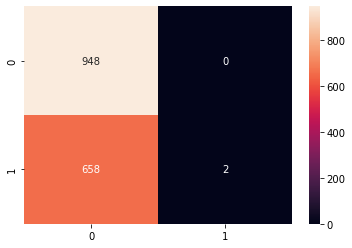

In [24]:
cm_train=confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm_train, annot=True, fmt='d')
plt.show()

In [25]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74       238
           1       0.00      0.00      0.00       165

    accuracy                           0.59       403
   macro avg       0.30      0.50      0.37       403
weighted avg       0.35      0.59      0.44       403



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
# model2
model2=LogisticRegression(max_iter=50)
model2.fit(X_train, y_train)
y_pred2=model2.predict(X_test)

In [27]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74       238
           1       0.00      0.00      0.00       165

    accuracy                           0.59       403
   macro avg       0.30      0.50      0.37       403
weighted avg       0.35      0.59      0.44       403



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### normalizacja

In [28]:
from sklearn.preprocessing import Normalizer, StandardScaler
normalizer=Normalizer()

In [29]:
normalizer.fit(X)
X_norm=normalizer.transform(X.values)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Normalizer was fitted with feature names
  warnings.warn(


In [30]:
X_n=X.copy()
X_n[:]=X_norm
X_norm

array([[3.77595623e-04, 9.73292461e-03, 9.99674413e-01, ...,
        8.37050249e-04, 4.55568638e-03, 2.10154226e-04],
       [5.05487981e-04, 1.00684543e-02, 9.99553249e-01, ...,
        6.42589941e-04, 1.77894888e-03, 2.26556426e-04],
       [1.94211647e-04, 6.54944006e-03, 9.99864500e-01, ...,
        2.92138429e-04, 1.91001485e-03, 8.90253291e-05],
       ...,
       [3.08960602e-04, 2.54923968e-03, 9.99901763e-01, ...,
        4.34839397e-04, 1.11738989e-03, 1.17477091e-04],
       [2.32151043e-04, 7.13934662e-03, 9.99757698e-01, ...,
        4.61563067e-04, 2.31094492e-03, 1.40359363e-04],
       [9.80988157e-05, 4.07016602e-03, 9.99900867e-01, ...,
        2.91987213e-04, 1.40142274e-03, 9.32175019e-05]])

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X_n,y, test_size=0.2)

### KNN k najbliższych sąsiadów

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred_knn=knn.predict(X_test)

In [34]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.64      0.65      0.65       263
           1       0.33      0.33      0.33       140

    accuracy                           0.54       403
   macro avg       0.49      0.49      0.49       403
weighted avg       0.54      0.54      0.54       403



In [35]:
knn2=KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn2.fit(X_train, y_train)
pred_knn2=knn2.predict(X_test)

In [36]:
print(classification_report(y_test, pred_knn2))

              precision    recall  f1-score   support

           0       0.65      0.70      0.68       263
           1       0.35      0.31      0.33       140

    accuracy                           0.56       403
   macro avg       0.50      0.50      0.50       403
weighted avg       0.55      0.56      0.56       403



In [37]:
knn3=KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn3.fit(X_train, y_train)
pred_knn3=knn3.predict(X_test)

In [38]:
print(classification_report(y_test, pred_knn3))

              precision    recall  f1-score   support

           0       0.64      0.68      0.66       263
           1       0.33      0.29      0.31       140

    accuracy                           0.55       403
   macro avg       0.49      0.49      0.49       403
weighted avg       0.53      0.55      0.54       403



In [39]:
knn4=KNeighborsClassifier(n_neighbors=7, metric='euclidean', weights='distance')
knn4.fit(X_train, y_train)
pred_knn4=knn4.predict(X_test)

In [40]:
print(classification_report(y_test, pred_knn4))

              precision    recall  f1-score   support

           0       0.63      0.66      0.64       263
           1       0.30      0.28      0.29       140

    accuracy                           0.53       403
   macro avg       0.47      0.47      0.47       403
weighted avg       0.52      0.53      0.52       403

